In [ ]:
import pandas as pd
import glob
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [ ]:
#I had to change access from "Restricted" to "Anyone with the link" in Google Drive
!gdown --id 1SDP7P--ijnrm2elxG732Rrlt_9pkxJuG -O usa_00003.csv


/usr/local/lib/python3.11/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (original): https://drive.google.com/uc?id=1SDP7P--ijnrm2elxG732Rrlt_9pkxJuG
From (redirected): https://drive.google.com/uc?id=1SDP7P--ijnrm2elxG732Rrlt_9pkxJuG&confirm=t&uuid=c0ac8095-0ea6-4476-838f-d876cc8dc2f4
To: /content/usa_00003.csv
100% 1.79G/1.79G [00:14<00:00, 122MB/s]


In [ ]:
import pandas as pd

chunk_size = 100000  # Adjust based on available memory
df_list = []  # Empty list to store chunks

# Read CSV in chunks
for chunk in pd.read_csv("usa_00003.csv", chunksize=chunk_size):
    df_list.append(chunk)  # Store each chunk

# Combine all chunks into one DataFrame
df = pd.concat(df_list, ignore_index=True)

# Show DataFrame information and first few rows
print(df.info())  # Check memory usage
print(df.head())  # Preview first rows


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77784358 entries, 0 to 77784357
Data columns (total 6 columns):
 #   Column  Dtype  
---  ------  -----  
 0   YEAR    int64  
 1   PERWT   float64
 2   SEX     int64  
 3   AGE     int64  
 4   MARST   int64  
 5   INCTOT  int64  
dtypes: float64(1), int64(5)
memory usage: 3.5 GB
None
   YEAR  PERWT  SEX  AGE  MARST   INCTOT
0  2000   19.0    2   30      6     7500
1  2000   21.0    1   16      6        0
2  2000   15.0    1   12      6  9999999
3  2000   16.0    1    9      6  9999999
4  2000   16.0    1    8      6  9999999


In [ ]:
# Filter relevant columns to reduce memory usage
df = df[["YEAR", "PERWT", "SEX", "MARST", "INCTOT"]]

# Filter for females and relevant marital statuses directly
df_filtered = df[(df["SEX"] == 2) & (df["MARST"].isin([1, 6, 3, 4, 5])) & (df["INCTOT"] != 9999999)]

# Map MARST values to descriptive labels
df_filtered["MARST"] = df_filtered["MARST"].map({
    1: "Married, spouse present",
    6: "Never married/single",
    3: "Separated",
    4: "Divorced",
    5: "Widowed"
})


<ipython-input-4-184852267764>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered["MARST"] = df_filtered["MARST"].map({


<ipython-input-5-9df3d4336e52>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered["MARST"] = df_filtered["MARST"].map(marst_mapping)


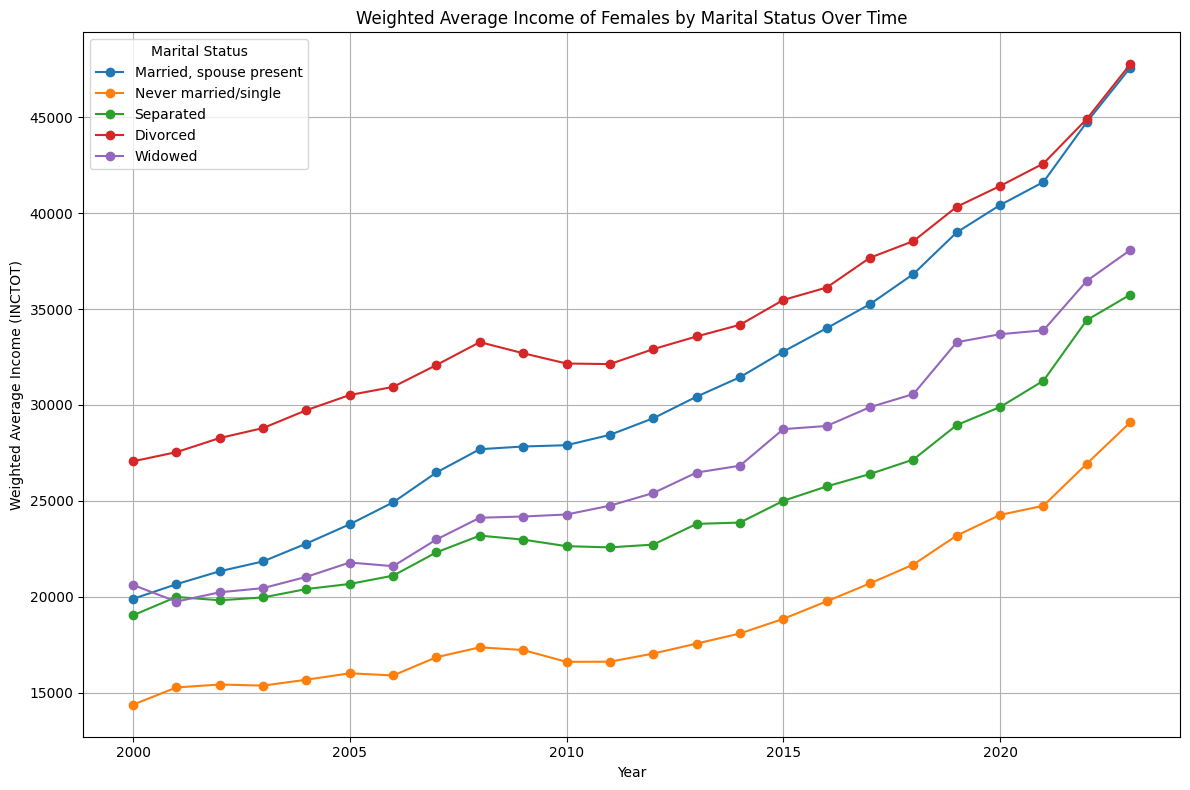

In [ ]:
# Define marital status mapping
marst_mapping = {
    1: "Married, spouse present",
    6: "Never married/single",
    3: "Separated",
    4: "Divorced",
    5: "Widowed"
}

# Filter dataset for females (SEX=2) and relevant marital statuses
df_filtered = df[(df["SEX"] == 2) & (df["MARST"].isin(marst_mapping.keys()))]

# Map MARST to descriptive labels
df_filtered["MARST"] = df_filtered["MARST"].map(marst_mapping)

# Exclude invalid INCTOT values (e.g., N/A = 9999999)
df_filtered = df_filtered[df_filtered["INCTOT"] != 9999999]

# Calculate weighted income (INCTOT * PERWT)
df_filtered["weighted_income"] = df_filtered["INCTOT"] * df_filtered["PERWT"]

# Group by YEAR and MARST, then calculate the weighted mean income
grouped = df_filtered.groupby(["YEAR", "MARST"]).agg(
    total_weighted_income=("weighted_income", "sum"),
    total_weights=("PERWT", "sum")
).reset_index()

# Calculate weighted mean income
grouped["weighted_mean_income"] = grouped["total_weighted_income"] / grouped["total_weights"]

# Plot the data
plt.figure(figsize=(12, 8))

# Plot each marital status as a separate line
for status in marst_mapping.values():
    subset = grouped[grouped["MARST"] == status]
    if not subset.empty:
        plt.plot(subset["YEAR"], subset["weighted_mean_income"], marker='o', label=status)

# Customize the plot
plt.xlabel("Year")
plt.ylabel("Weighted Average Income (INCTOT)")
plt.title("Weighted Average Income of Females by Marital Status Over Time")
plt.legend(title="Marital Status")
plt.grid(True)
plt.tight_layout()
plt.show()
